In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np 
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [74]:
# import data
data = pd.read_csv('customer_churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [75]:
# view data
pd.set_option('display.max_columns', None)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [76]:
# replace false/no = 0 and true/yes = 1
data.replace(False, 0, inplace = True)
data.replace('no', 0, inplace = True)
data.replace(True, 1, inplace = True)
data.replace('yes', 1, inplace = True)

In [77]:
# rename columns bec of the space
data.rename(columns = {'state': 'state',
                     'account length':'account_length', 
                     'area code': 'area_code', 
                     'phone number': 'phone_number', 
                     'international plan': 'intl_plan', 
                     'voice mail plan': 'voicemail_plan', 
                     'number vmail messages': 'voicemails_qty', 
                     'total day minutes':'total_day_mins',
                     'total day calls':'total_day_calls', 
                     'total day charge':'total_day_charge', 
                     'total eve minutes':'total_eve_mins', 
                     'total eve calls': 'total_eve_calls', 
                     'total eve charge': 'total_eve_charge', 
                     'total night minutes':'total_night_mins', 
                     'total night calls':'total_night_calls', 
                     'total night charge': 'total_night_charge', 
                     'total intl minutes':'total_intl_mins', 
                     'total intl calls': 'total_intl_calls', 
                     'total intl charge': 'total_intl_charge', 
                     'customer service calls': 'customer_service_calls',
                     'churn': 'customer_churn'}, inplace = True)

In [78]:
# calc total charge
data['total_charge'] = (data['total_day_charge'] 
                          + data['total_eve_charge'] 
                          + data['total_night_charge'] 
                          + data['total_intl_charge'])

In [79]:
# calc total calls
data['total_calls'] = (data['total_day_calls'] 
                          + data['total_eve_calls'] 
                          + data['total_night_calls'] 
                          + data['total_intl_calls'])

In [80]:
# calc total minutes
data['total_mins'] = (data['total_day_mins'] 
                          + data['total_eve_mins'] 
                          + data['total_night_mins'] 
                          + data['total_intl_mins'])

In [81]:
data.describe()

,account_length,area_code,intl_plan,voicemail_plan,voicemails_qty,total_day_mins,total_day_calls,total_day_charge,total_eve_mins,total_eve_calls,total_eve_charge,total_night_mins,total_night_calls,total_night_charge,total_intl_mins,total_intl_calls,total_intl_charge,customer_service_calls,customer_churn,total_charge,total_calls,total_mins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754,305.137114,591.864776
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261,34.448164,89.954251
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000,191.000000,284.300000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000,282.000000,531.500000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000,305.000000,593.600000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000,328.000000,652.400000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,96.150000,416.000000,885.000000


In [82]:
# check balance of target data 
data['customer_churn'].value_counts()

0.0    2850
1.0     483
Name: customer_churn, dtype: int64

In [83]:
# check balance of target date with percentages
data['customer_churn'].value_counts(normalize=True)

0.0    0.855086
1.0    0.144914
Name: customer_churn, dtype: float64

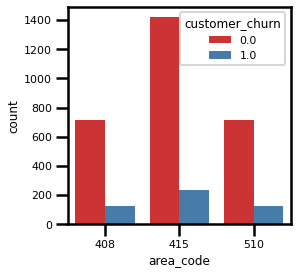

In [84]:
# plot churn vs not churn based on area codes
plt.subplots(figsize=(4, 4))
sns.set_context('poster', font_scale = 0.5)
sns.countplot(x = 'area_code', hue = 'customer_churn', data = data, palette = 'Set1');

Mean Account Length for Not Churn    : 3.36
Std Dev Account Length for Not Churn : 1.33
Mean Account Length for Churn        : 3.42
Std Dev Account Length for Churn     : 1.32


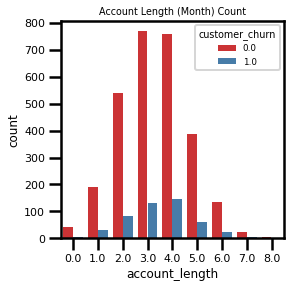

In [85]:
# change from day to month
account_length_month = round(data['account_length']/30)

# plot churn vs not churn based on account length - month
plt.subplots(figsize = (4, 4))
sns.set_context('poster', font_scale = 0.4)
plt.title('Account Length (Month) Count')
sns.countplot(x = account_length_month, hue = 'customer_churn', data = data, palette = 'Set1')

print('Mean Account Length for Not Churn    :', round((data[data['customer_churn']==0]['account_length']/30).mean(),2))
print('Std Dev Account Length for Not Churn :', round((data[data['customer_churn']==0]['account_length']/30).std(),2))
print('Mean Account Length for Churn        :', round((data[data['customer_churn']==1]['account_length']/30).mean(),2))
print('Std Dev Account Length for Churn     :', round((data[data['customer_churn']==1]['account_length']/30).std(),2))

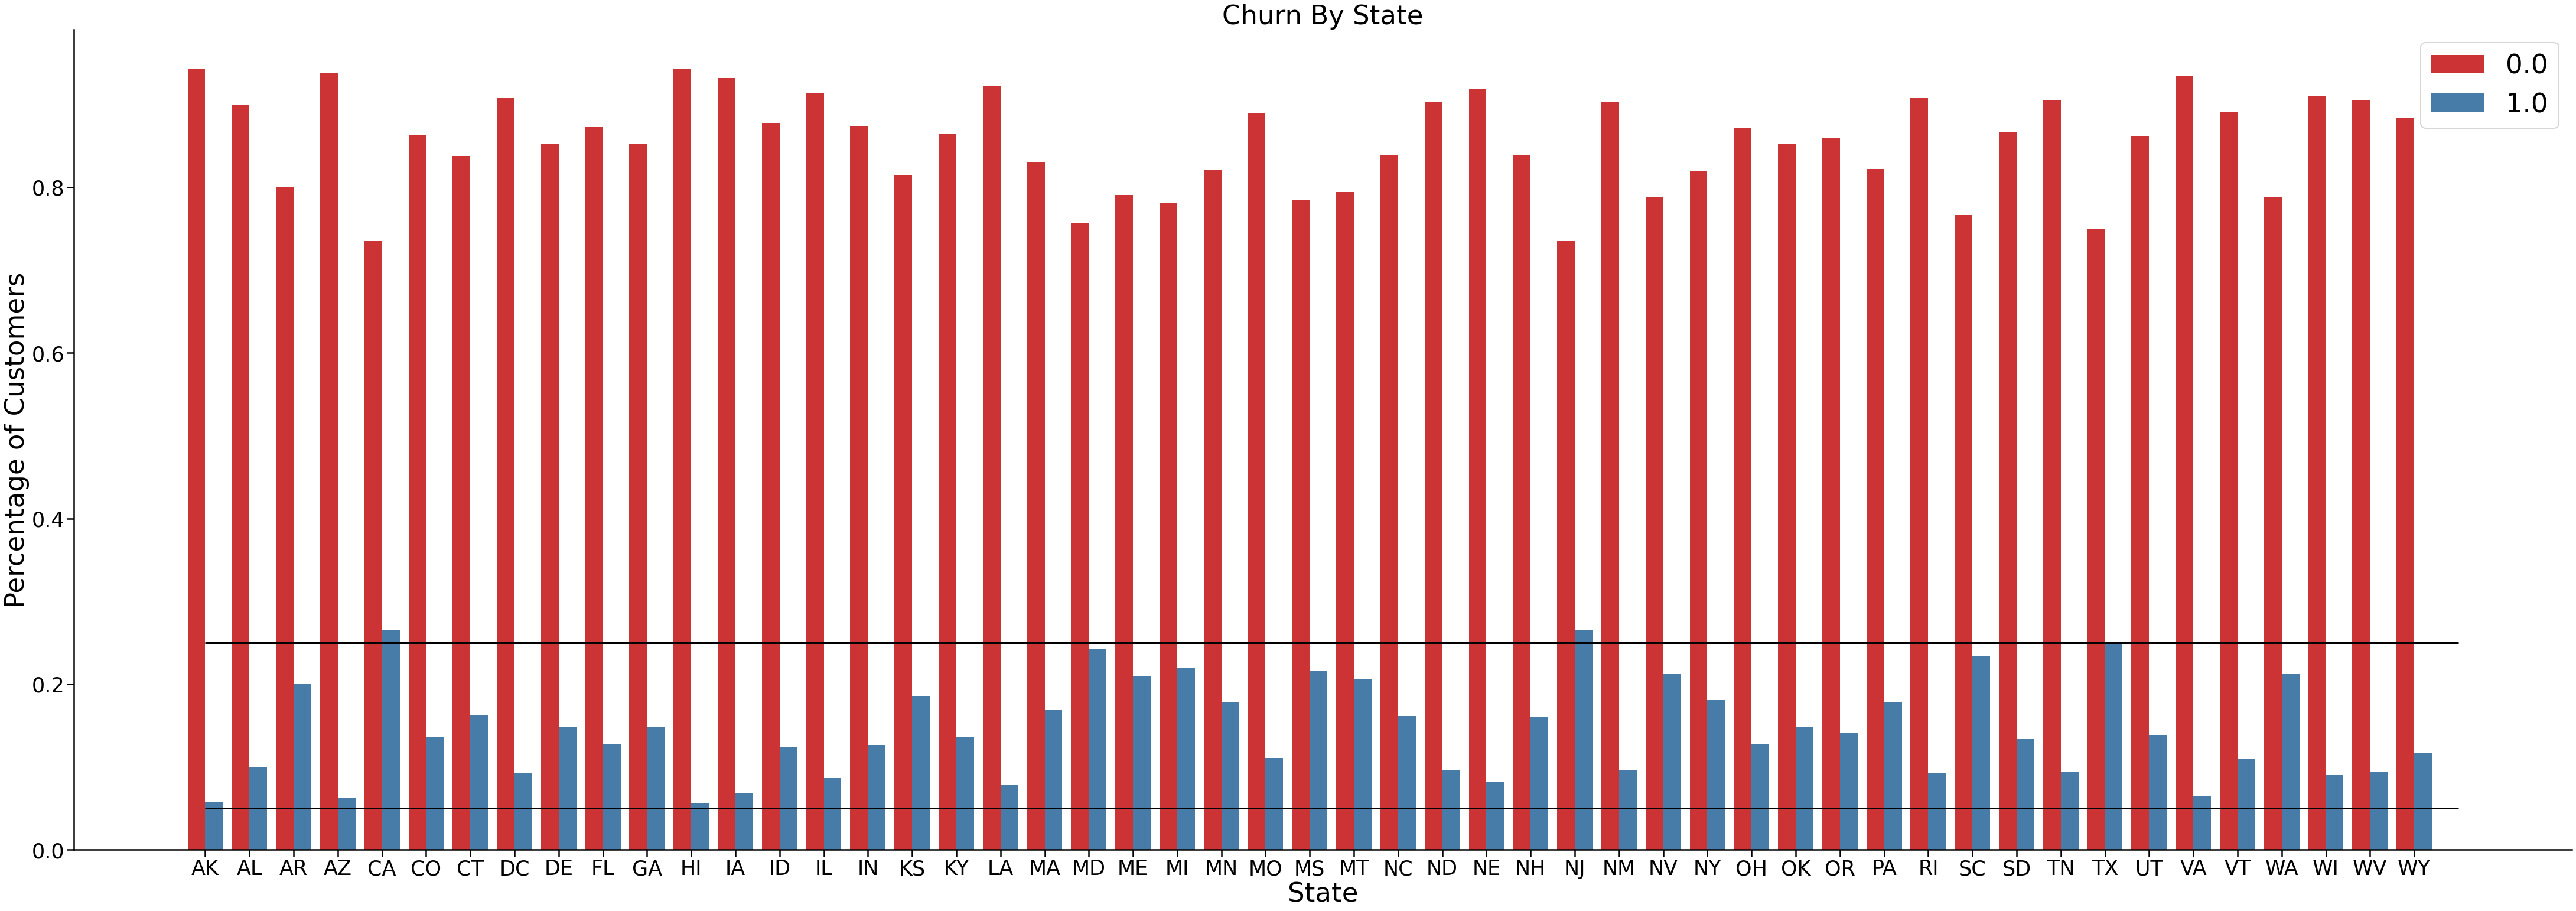

In [86]:
# churn rates group by states
churn_by_state = data.groupby('state')['customer_churn'].value_counts(normalize=True)
churn_by_state = pd.DataFrame(churn_by_state)
churn_by_state.columns = ['value']
churn_by_state = churn_by_state.reset_index()

sns.set_context('poster', font_scale = 0.5)
g = sns.catplot(data = churn_by_state, kind = 'bar', x = 'state', y = 'value', 
            hue = 'customer_churn', palette = 'Set1', alpha=1, height=20, aspect=3)
plt.title('Churn By State', fontsize = 45)
plt.ylabel('Percentage of Customers', fontsize = 45)
plt.xlabel('State', fontsize = 45)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35) 
plt.legend(fontsize = 45)
g._legend.remove()
plt.hlines(y = 0.25, xmin=0, xmax=51, color='black')
plt.hlines(y = 0.05, xmin=0, xmax=51, color='black');

The number of customers with international plan: 323
The number of customers with no international plan: 3010


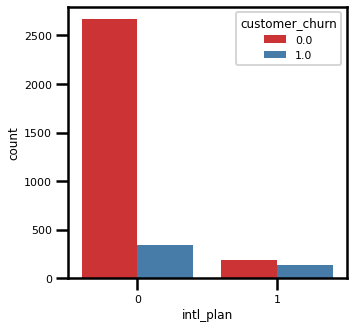

In [87]:
# number of customer with and without international plans
intl_plan = data[data['intl_plan'] == 1]
print('The number of customers with international plan:', len(intl_plan))
no_intl_plan = data[data['intl_plan'] == 0]
print('The number of customers with no international plan:', len(no_intl_plan))
sns.set_context('poster', font_scale = 0.5)
plt.subplots(figsize = (5, 5))
sns.countplot(x = 'intl_plan', hue = 'customer_churn', data = data, palette = 'Set1');

In [88]:
# churn rates by international plan
churn_by_intl_plan = data.groupby('intl_plan')['customer_churn'].value_counts(normalize=True)
churn_by_intl_plan = pd.DataFrame(churn_by_intl_plan)
churn_by_intl_plan.columns = ['value']
churn_by_intl_plan = churn_by_intl_plan.reset_index()
churn_by_intl_plan 

,intl_plan,customer_churn,value
0,0,0.0,0.885050
1,0,1.0,0.114950
2,1,0.0,0.575851
3,1,1.0,0.424149


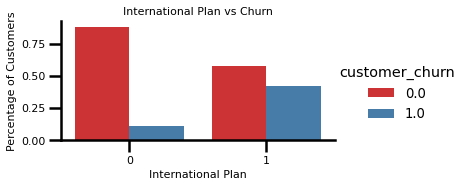

In [89]:
sns.set_context('poster', font_scale = 0.6)
sns.catplot(data = churn_by_intl_plan, kind = 'bar', x = 'intl_plan', y = 'value', hue = 'customer_churn', 
            palette = 'Set1', alpha=1, height=2.5, aspect=2)
plt.title('International Plan vs Churn', fontsize = 11)
plt.ylabel('Percentage of Customers', fontsize = 11)
plt.xlabel('International Plan', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11) 
plt.show()

The number of customers with voicemail plan: 922
The number of customers with no voicemail plan: 2411


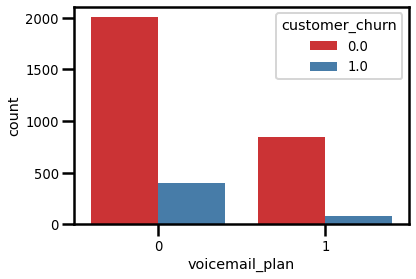

In [90]:
# number of customers with & without voicemail plans
voicemail_plan = data[data['voicemail_plan'] == 1]
print('The number of customers with voicemail plan:', len(voicemail_plan))
no_voicemail_plan = data[data['voicemail_plan'] == 0]
print('The number of customers with no voicemail plan:', len(no_voicemail_plan))
sns.set_context('poster', font_scale = 0.6)
sns.countplot(x = 'voicemail_plan', hue = 'customer_churn', data = data, palette = 'Set1');

In [91]:
# churn rates by voicemail plan
churn_by_voicemail_plan = data.groupby('voicemail_plan')['customer_churn'].value_counts(normalize=True)
churn_by_voicemail_plan = pd.DataFrame(churn_by_voicemail_plan)
churn_by_voicemail_plan.columns = ['value']
churn_by_voicemail_plan = churn_by_voicemail_plan.reset_index()
churn_by_voicemail_plan 

,voicemail_plan,customer_churn,value
0,0,0.0,0.832849
1,0,1.0,0.167151
2,1,0.0,0.913232
3,1,1.0,0.086768


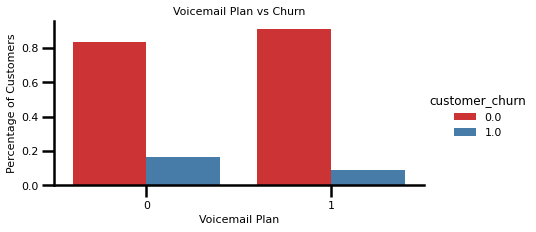

In [92]:
sns.set_context('poster', font_scale = 0.5)
sns.catplot(data = churn_by_voicemail_plan, kind = 'bar', x = 'voicemail_plan', y = 'value', 
            hue = 'customer_churn', palette = 'Set1', alpha=1, height=3, aspect=2)
plt.title('Voicemail Plan vs Churn', fontsize = 11)
plt.ylabel('Percentage of Customers', fontsize = 11)
plt.xlabel('Voicemail Plan', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11) 
plt.show()

In [93]:
# churn rates by number of voicemail messages
churn_vm_qty = data.groupby('voicemails_qty')['customer_churn'].value_counts(normalize=True)
churn_vm_qty = pd.DataFrame(churn_vm_qty)
churn_vm_qty.columns = ['value']
churn_vm_qty = churn_vm_qty.reset_index()

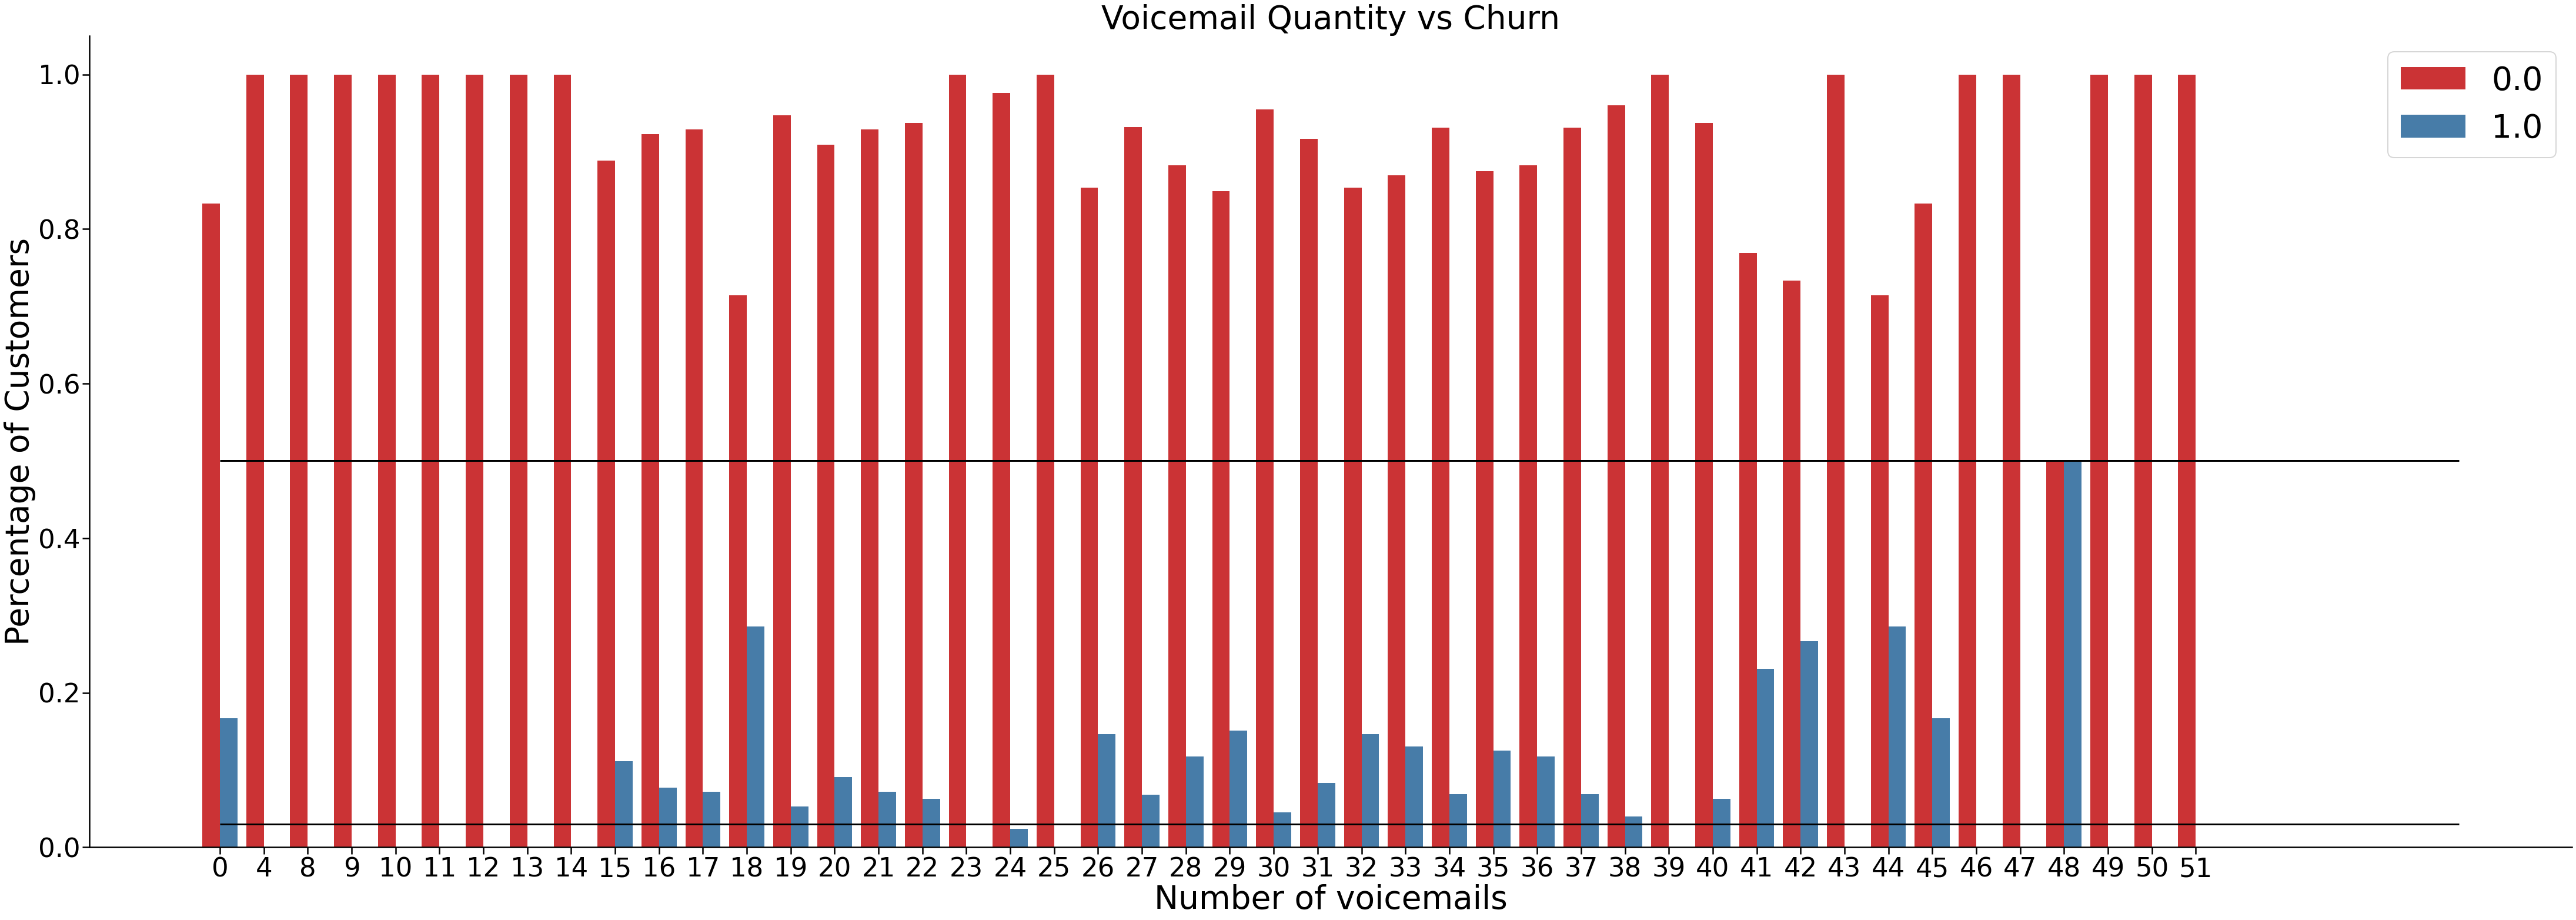

In [94]:
sns.set_context('poster', font_scale = 0.6)
g = sns.catplot(data = churn_vm_qty, kind = 'bar', x = 'voicemails_qty', y = 'value', 
            hue = 'customer_churn', palette = 'Set1', alpha=1, height=20, aspect=3)
plt.title('Voicemail Quantity vs Churn', fontsize = 55)
plt.ylabel('Percentage of Customers', fontsize = 55)
plt.xlabel('Number of voicemails', fontsize = 55)
plt.xticks(fontsize = 45)
plt.yticks(fontsize = 45) 
plt.legend(fontsize = 55)
g._legend.remove()
plt.hlines(y = 0.50, xmin=0, xmax=51, color='black')
plt.hlines(y = 0.03, xmin=0, xmax=51, color='black');

In [95]:
# count of number of customer service calls
customer_service = data.groupby('customer_service_calls')['customer_churn'].agg(['count'])
customer_service

,count
customer_service_calls,
0,697
1,1181
2,759
3,429
4,166
5,66
6,22
7,9
8,2


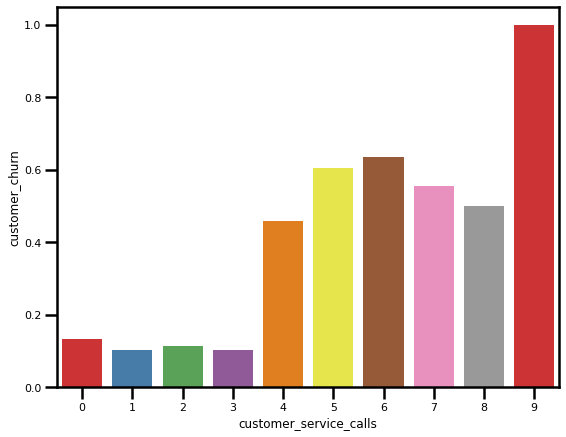

In [96]:
sns.set_context('poster', font_scale = 0.5)
plt.figure(figsize=(9, 7))
sns.barplot(x='customer_service_calls', y='customer_churn', data=data, palette='Set1', ci=None);

In [97]:
# create a table for total numbers vs customer churn
calls = data[['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'total_calls','customer_churn']]
calls.head()

,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,total_calls,customer_churn
0,110,99,91,3,303,0.0
1,123,103,103,3,332,0.0
2,114,110,104,5,333,0.0
3,71,88,89,7,255,0.0
4,113,122,121,3,359,0.0


In [98]:
calls_churn = calls.groupby('customer_churn').sum().reset_index()
calls_churn

,customer_churn,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,total_calls
0,0.0,285807,285110,285166,12919,869002
1,1.0,48945,48571,48493,2011,148020


In [99]:
r = calls_churn['customer_churn']

# Turn call values to percentages
totals = calls_churn['total_calls']
DayBars = calls_churn['total_day_calls'] / totals
EveBars = calls_churn['total_eve_calls'] / totals
NightBars = calls_churn['total_night_calls'] / totals
IntlBars = calls_churn['total_intl_calls'] / totals

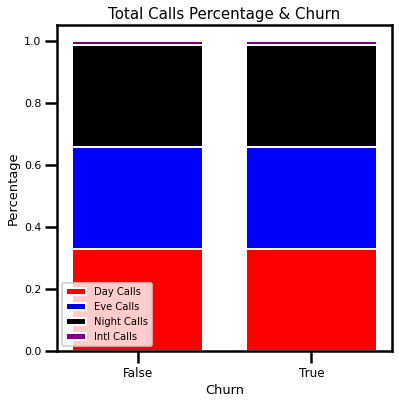

In [100]:
plt.figure(figsize=(6,6))
names = ('False', 'True')
barWidth = 0.75

# Day calls
plt.bar(r, DayBars, color='red', edgecolor='white',
        width=barWidth, label='Day Calls')

# Eve calls
plt.bar(r, EveBars, bottom=DayBars, color='blue',
        edgecolor='white', width=barWidth, label='Eve Calls')

# Night calls
plt.bar(r, NightBars, bottom=[i+j for i,j in zip(DayBars, EveBars)],
        color='black', edgecolor='white', width=barWidth, label='Night Calls')

# Intl Calls
plt.bar(r, IntlBars, bottom=[i+j+k for i,j,k in zip(DayBars, EveBars, NightBars)],
        color='purple', edgecolor='white', width=barWidth, label='Intl Calls')

plt.xticks(r, names, fontsize=12)
plt.xlabel('Churn', fontsize=13)
plt.ylabel('Percentage', fontsize=13)
plt.title('Total Calls Percentage & Churn', fontsize=15)
plt.legend(fontsize='small')
plt.show()

In [101]:
# calc rate per min by time
day_rate = (data['total_day_charge'] / data['total_day_mins']).median()
eve_rate = (data['total_eve_charge'] / data['total_eve_mins']).median()
night_rate = (data['total_night_charge'] / data['total_night_mins']).median()
intl_rate = (data['total_intl_charge'] / data['total_intl_mins']).median()
print("Day Rate:", day_rate)
print("Eve Rate:", eve_rate)
print("Night Rate:", night_rate)
print("International Rate:", intl_rate)

Day Rate: 0.17000415454923143
Eve Rate: 0.085
Night Rate: 0.045
International Rate: 0.27


In [102]:
# calc rates of making one international call - with and without international plan
intl_plan = data[data['intl_plan'] == 1]
no_intl_plan = data[data['intl_plan'] == 0]
intl_plan_rate = (intl_plan['total_intl_charge'] / intl_plan['total_intl_mins']).median()
non_intl_plan_rate = (no_intl_plan['total_intl_charge'] / no_intl_plan['total_intl_mins']).median()
print("International Plan Rate:", intl_plan_rate)
print("Non-International Plan Rate: ", non_intl_plan_rate)

International Plan Rate: 0.27
Non-International Plan Rate:  0.27


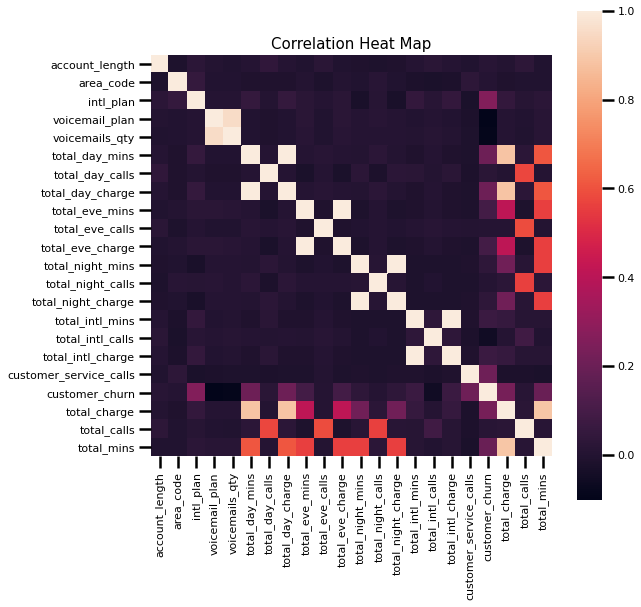

In [103]:
corrmat = data.corr()
plt.subplots(figsize=(9, 9))

sns.heatmap(corrmat, square=True)
plt.title("Correlation Heat Map", fontsize=15)
plt.show()

In [104]:
data = data.drop(['area_code','phone_number', 'account_length', 'total_charge', 'total_calls', 'total_mins', 
          'total_day_charge','total_eve_charge', 'total_night_charge', 'total_intl_charge', 'state'], axis =1)

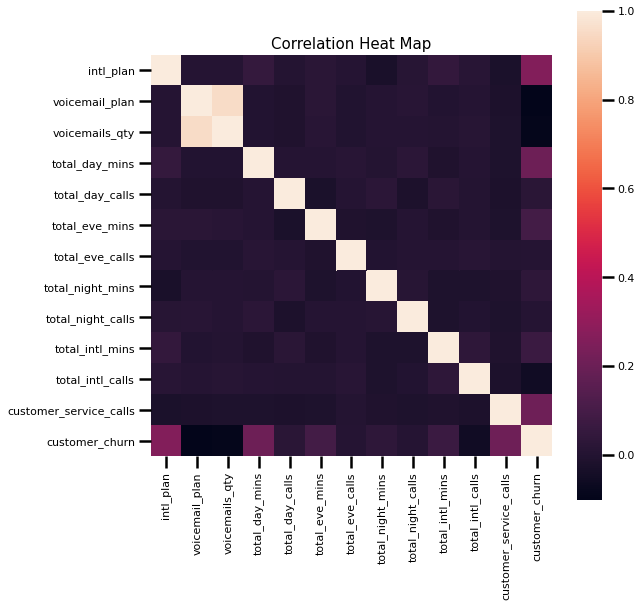

In [105]:
corrmat = data.corr()
plt.subplots(figsize=(9, 9))

sns.heatmap(corrmat, square=True)
plt.title("Correlation Heat Map", fontsize=15)
plt.show()

In [106]:
x = data.drop(['customer_churn'], axis =1)
y = data.customer_churn

In [107]:
# train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 420)

In [108]:
def model_predictions(model, x_train, x_test, y_train, y_test):
    '''Enter model name and test/train sets to generate predictions, precision, recall, accuracy and F1 score'''
    model.fit(x_train, y_train)
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('----')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('----')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('----')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

In [109]:
def confusion_matrix(model, x_test, y_test):
    '''Plot confusion matrix with test set'''
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Reds)
    plt.show()

In [110]:
def plot_roc(model, x_train, x_test, y_train, y_test):
    '''Plot ROC for test set and train set with decision_function'''
    y_test_score = model.decision_function(x_test)
    y_train_score = model.decision_function(x_train)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'blue', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

In [111]:
def plot_roc_proba(model, X_train, X_test, y_train, y_test):
    '''Plot ROC for test set and train set with predict_proba'''
    y_test_score = model.predict_proba(x_test_scaled)
    y_train_score = model.predict_proba(x_train_scaled)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score[:,1])
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score[:,1])

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'blue', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

### K-Nearest Neighbor

In [112]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [113]:
model_predictions(knn, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.9419642857142857
Testing Precision:  0.8529411764705882
----
Training Recall:  0.5382653061224489
Testing Recall:  0.31868131868131866
----
Training Accuracy:  0.927231807951988
Testing Accuracy:  0.8995502248875562
----
Training F1-Score:  0.6850649350649349
Testing F1-Score:  0.464


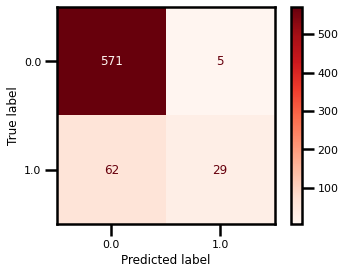

In [114]:
confusion_matrix(knn, x_test_scaled, y_test)

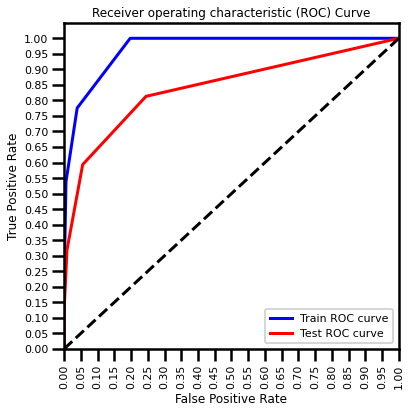

Train AUC: 0.9671026062139896
Test AUC: 0.8410409035409036


In [115]:
plot_roc_proba(knn, x_train_scaled, x_test_scaled, y_train, y_test)

### Model 2

In [116]:
def find_best_k(x_train_scaled, y_train, x_test_scaled, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        train_score = knn.score(x_train_scaled, y_train)
        test_score = knn.score(x_test_scaled, y_test)
        if test_score > best_score:
            best_k = k
            best_score = test_score
    
    print("Best Value for k: {}".format(best_k))
    
find_best_k(x_train_scaled, y_train, x_test_scaled, y_test)

Best Value for k: 7


In [117]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [118]:
model_predictions(knn_3, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.9253731343283582
Testing Precision:  0.7435897435897436
----
Training Recall:  0.6326530612244898
Testing Recall:  0.31868131868131866
----
Training Accuracy:  0.9384846211552889
Testing Accuracy:  0.8920539730134932
----
Training F1-Score:  0.7515151515151516
Testing F1-Score:  0.4461538461538461


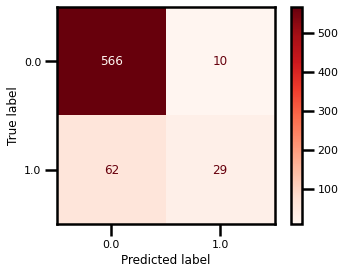

In [119]:
confusion_matrix(knn_3, x_test_scaled, y_test)

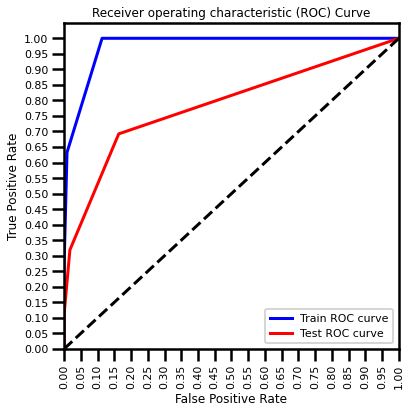

Train AUC: 0.975930213774164
Test AUC: 0.7855044261294262


In [120]:
plot_roc_proba(knn_3, x_train_scaled, x_test_scaled, y_train, y_test)

### GridSearch

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=420)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_gs = KNeighborsClassifier()

knn_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13],
            'weights':['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'n_jobs': [-1]}

knn_gridsearch = GridSearchCV(estimator=knn_clf_gs, 
                              param_grid=knn_grid, 
                              cv=5,
                              return_train_score=True)


# Fit to the data
knn_gridsearch.fit(X_train_scaled, y_train)

# Best parameters for our Decision Tree model:
print('Best parameters for Our KNN Model:')
knn_gridsearch.best_params_

Best parameters for Our KNN Model:


{'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 3, 'weights': 'uniform'}

In [136]:
knn_clf_gs = KNeighborsClassifier(metric='manhattan', 
                                  n_jobs=-1, 
                                  n_neighbors=7, 
                                  weights='uniform')

knn_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_gs.score(X_test_scaled, y_test))

Train Score: 0.9133533383345837
Test Score: 0.8950524737631185


In [137]:
def plot_roc_pp(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with predict_proba attribute.
    """
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [138]:
def model_control_pp(model, X_train, X_test, y_train, y_test):

    """
    This function includes all the functions we created above.
    Roc Curve has predict_proba attribute.
    """
    
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')
    
    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc_pp(model, X_train, X_test, y_train, y_test)

Train Score: 0.9133533383345837
Test Score: 0.8950524737631185
------------------------------------
Training Precision:  0.9351351351351351
Testing Precision:  0.8
----
Training Recall:  0.4413265306122449
Testing Recall:  0.3076923076923077
----
Training Accuracy:  0.9133533383345837
Testing Accuracy:  0.8950524737631185
----
Training F1-Score:  0.5996533795493934
Testing F1-Score:  0.4444444444444444


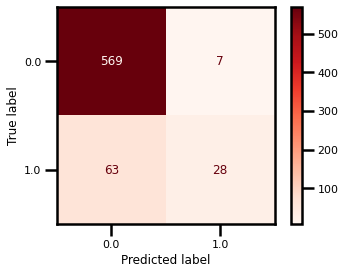

Train AUC: 0.9605130310699479
Test AUC: 0.8382077991452992
------------------------------------


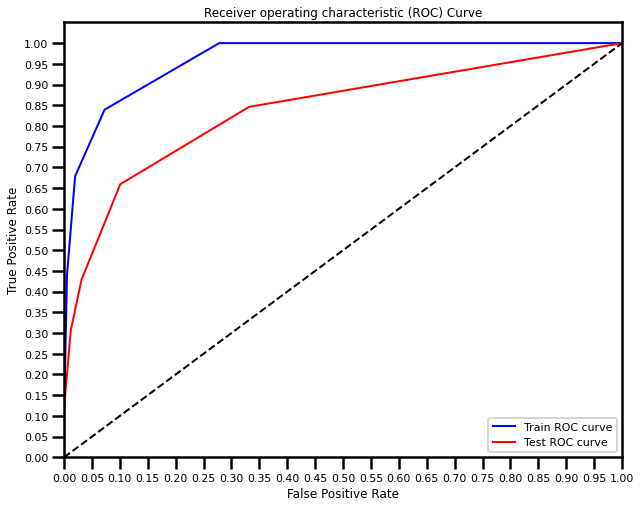

In [139]:
model_control_pp(knn_clf_gs, X_train_scaled, X_test_scaled, y_train, y_test)
